In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np
from keras.layers import Dropout

In [3]:
pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
model=Sequential()
model.add(Conv2D(60,(1,1),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(50,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=6,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 60)        240       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 60)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 50)        27050     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1800)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set =train_datagen.flow_from_directory('C:/Users/vikas/OneDrive/Desktop/dataset/training_set',target_size = (64, 64),batch_size = 40,class_mode = 'sparse')
test_set = test_datagen.flow_from_directory('C:/Users/vikas/OneDrive/Desktop/dataset/test_set',target_size = (64, 64),batch_size = 4,class_mode = 'sparse')

Found 2019 images belonging to 6 classes.
Found 502 images belonging to 6 classes.


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(training_set,steps_per_epoch = 50,epochs = 80,validation_data=test_set, validation_steps=5)

Epoch 1/80
50/50 [==============================] - 14s 282ms/step - loss: 0.1657 - accuracy: 0.9404 - val_loss: 1.2926 - val_accuracy: 0.6500
Epoch 2/80
50/50 [==============================] - 12s 239ms/step - loss: 0.1564 - accuracy: 0.9434 - val_loss: 1.1654 - val_accuracy: 0.7000
Epoch 3/80
50/50 [==============================] - 11s 226ms/step - loss: 0.1620 - accuracy: 0.9409 - val_loss: 1.1168 - val_accuracy: 0.7500
Epoch 4/80
50/50 [==============================] - 12s 237ms/step - loss: 0.1895 - accuracy: 0.9298 - val_loss: 2.4527 - val_accuracy: 0.7000
Epoch 5/80
50/50 [==============================] - 11s 227ms/step - loss: 0.1796 - accuracy: 0.9338 - val_loss: 2.2328 - val_accuracy: 0.5500
Epoch 6/80
50/50 [==============================] - 12s 233ms/step - loss: 0.1898 - accuracy: 0.9323 - val_loss: 1.5018 - val_accuracy: 0.7500
Epoch 7/80
50/50 [==============================] - 12s 236ms/step - loss: 0.1499 - accuracy: 0.9469 - val_loss: 1.4076 - val_accuracy: 0.7000

In [31]:
test_loss, test_accuracy = model.evaluate(test_set )
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

126/126 [==============================] - 6s 45ms/step - loss: 1.6823 - accuracy: 0.7450
Test Loss: 1.6822582483291626
Test Accuracy: 0.7450199127197266


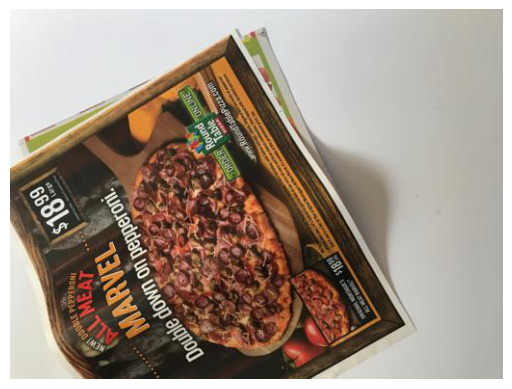

1/1 [==============================] - 0s 24ms/step
[[0. 0. 0. 1. 0. 0.]]
paper


In [32]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
image_path = 'C:/Users/vikas/OneDrive/Desktop/dataset/test_set/paper_test/paper487.jpg'
test_image =image.load_img(image_path,target_size = (64, 64))

import matplotlib.pyplot as plt
from PIL import Image

image_data = plt.imread(image_path)

# Display the image
plt.imshow(image_data)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()





test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)



result = model.predict(test_image)
print(result)
res=result[0]
val=max(res)
ind = np.where(res == val)[0]
class_names = ['Cardboard', 'glass', 'metal', 'paper','plastic','trash']  # Replace with your class names
predicted_class_name = class_names[int(ind)]
print(predicted_class_name)

126/126 [==============================] - 2s 16ms/step
[[ 9 15 14 25 11  1]
 [14 25 17 28 11  6]
 [16 16 16 18 14  2]
 [14 25 20 38 21  1]
 [15 27  8 27 18  2]
 [ 6  5 10  3  4  0]]


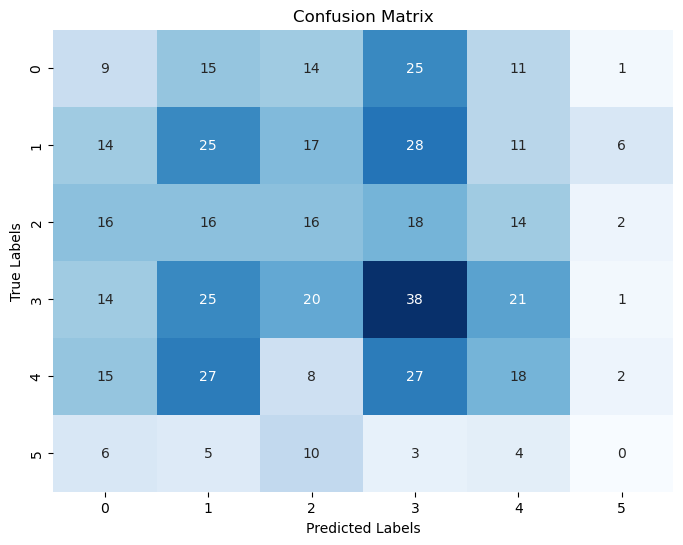

In [28]:
from sklearn.metrics import confusion_matrix

# Get true labels
true_labels = test_set.classes

# Generate predicted labels for all test images
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix with colormap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)

# Set axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()